In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('perceptron_toydata-truncated.txt', sep = '\t')
df.head()

,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-0.63,-1.53,0


In [5]:
X_train = df[['x1', 'x2']].values
y_train = df['label'].values

### 2) Data Visualization

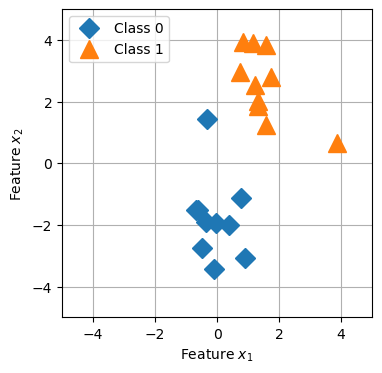

In [6]:
plt.figure(figsize=(4, 4))
plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker = 'D',
    markersize = 10,
    linestyle = '',
    label = 'Class 0'
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker = '^',
    markersize = 13,
    linestyle = '',
    label = 'Class 1'
)

plt.legend(loc = 'upper left')

plt.xlim([-5,5])
plt.ylim([-5,5])

plt.xlabel('Feature $x_1$')
plt.ylabel('Feature $x_2$')

plt.grid()
plt.show()

### 3) Original perceptron from last time

In [7]:
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0.0

    def forward(self, x):
        weighted_sum_z = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum_z += x[i] * self.weights[i]
        
        if weighted_sum_z > 0:
            return 1
        else:
            return 0
    
    def update(self, x, true_y):
        prediction = self.forward(x)
        error = true_y - prediction

        # update
        self.bias += error
        for i, _ in enumerate(self.weights):
            self.weights[i] += error * x[i]
        
        return error
    
    def train(self, X_train, y_train, epochs):
        if X_train.shape[1] != self.num_features:
            raise ValueError('Number of features does not match')
        
        for epoch in range(epochs):
            epoch_error = 0.0

            for x, y_true in zip(X_train, y_train):
                error = self.update(x, y_true)
                epoch_error += abs(error)
            
            print(f'Epoch {epoch + 1}: error = {epoch_error}')
            
            if epoch_error == 0:
                print('\tEarly stopping')
                break

    def score(self, X, y):
        num_correct = 0
        for x, y in zip(X, y):
            prediction = self.forward(x)
            num_correct += int(prediction == y)
        
        return num_correct / len(X)

### 4) Excercise 1 
#### Modifying train function: Add early-stopping to make the Perceptron more efficient.

In [8]:
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0.0

    def forward(self, x):
        weighted_sum_z = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum_z += x[i] * self.weights[i]
        
        if weighted_sum_z > 0:
            return 1
        else:
            return 0
    
    def update(self, x, true_y):
        prediction = self.forward(x)
        error = true_y - prediction

        # update
        self.bias += error
        for i, _ in enumerate(self.weights):
            self.weights[i] += error * x[i]
        
        return error
    
    def train(self, X_train, y_train, epochs):
        if X_train.shape[1] != self.num_features:
            raise ValueError('Number of features does not match')
        
        for epoch in range(epochs):
            epoch_error = 0.0

            for x, y_true in zip(X_train, y_train):
                error = self.update(x, y_true)
                epoch_error += abs(error)
            
            print(f'Epoch {epoch + 1}: error = {epoch_error}')
            
            if epoch_error == 0:
                print('\tEarly stopping')
                break

    def score(self, X, y):
        num_correct = 0
        for x, y in zip(X, y):
            prediction = self.forward(x)
            num_correct += int(prediction == y)
        
        return num_correct / len(X)

In [9]:
ppn = Perceptron(num_features = 2)
ppn.train(X_train, y_train, epochs = 100)

Epoch 1: error = 1.0
Epoch 2: error = 3.0
Epoch 3: error = 1.0
Epoch 4: error = 0.0
	Early stopping


In [10]:
ppn.score(X_train, y_train)

1.0

In [11]:
def plot_boundary(model):

    w1, w2 = model.weights[0], model.weights[1]
    b = model.bias

    x1_min = -20
    x2_min = (-(w1 * x1_min) - b) / w2

    x1_max = 20
    x2_max = (-(w1 * x1_max) - b) / w2

    return x1_min, x1_max, x2_min, x2_max

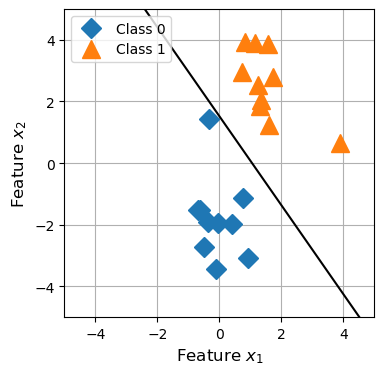

In [12]:
x1_min, x1_max, x2_min, x2_max = plot_boundary(ppn)

plt.figure(figsize=(4, 4))
plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)
plt.plot([x1_min, x1_max], [x2_min, x2_max], color="k")

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()

### 5) Excercise 2
#### Initialize the model parameters with small random numbers instead of 0’s

In [13]:
import random

class Perceptron:
    def __init__(self, num_features):
        random.seed(123)
        self.num_features = num_features
        self.weights = [random.uniform(-0.5, 0.5) for _ in range(num_features)]
        self.bias = random.uniform(-0.5, 0.5)

    def forward(self, x):
        weighted_sum_z = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum_z += x[i] * self.weights[i]
        
        if weighted_sum_z > 0:
            return 1
        else:
            return 0
    
    def update(self, x, true_y):
        prediction = self.forward(x)
        error = true_y - prediction

        # update
        self.bias += error
        for i, _ in enumerate(self.weights):
            self.weights[i] += error * x[i]
        
        return error
    
    def train(self, X_train, y_train, epochs):
        if X_train.shape[1] != self.num_features:
            raise ValueError('Number of features does not match')
        
        for epoch in range(epochs):
            epoch_error = 0.0

            for x, y_true in zip(X_train, y_train):
                error = self.update(x, y_true)
                epoch_error += abs(error)
            
            print(f'Epoch {epoch + 1}: error = {epoch_error}')
            
            if epoch_error == 0:
                print('\tEarly stopping')
                break

    def score(self, X, y):
        num_correct = 0
        for x, y in zip(X, y):
            prediction = self.forward(x)
            num_correct += int(prediction == y)
        
        return num_correct / len(X)

In [14]:
ppn = Perceptron(2)


In [15]:
ppn.train(X_train, y_train, epochs = 10)

Epoch 1: error = 4.0
Epoch 2: error = 1.0
Epoch 3: error = 0.0
	Early stopping


As we can see our model trained faster and with less epochs. This is because we are not initializing the weights to 0, but to small random numbers. This way, the model can learn faster and more efficiently.

In [16]:
ppn.score(X_train, y_train)

1.0

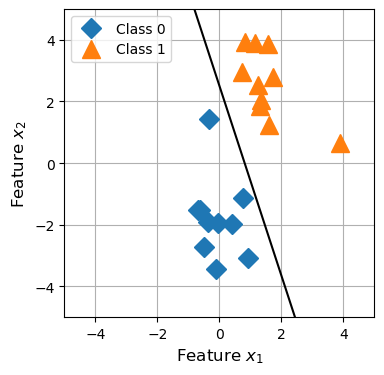

In [17]:
x1_min, x1_max, x2_min, x2_max = plot_boundary(ppn)

plt.figure(figsize=(4, 4))
plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)
plt.plot([x1_min, x1_max], [x2_min, x2_max], color="k")

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()

### 6) Excercise 3
#### Use a learning rate for updating the weights and bias unit

In [18]:
import random

class Perceptron:
    def __init__(self, num_features, alpha = 1.0):
        random.seed(123)
        self.num_features = num_features
        self.alpha = alpha
        self.weights = [random.uniform(-0.5, 0.5) for _ in range(num_features)]
        self.bias = random.uniform(-0.5, 0.5)

    def forward(self, x):
        weighted_sum_z = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum_z += x[i] * self.weights[i]
        
        if weighted_sum_z > 0:
            return 1
        else:
            return 0
    
    def update(self, x, true_y):
        prediction = self.forward(x)
        error = true_y - prediction

        # update
        self.bias += error
        for i, _ in enumerate(self.weights):
            self.weights[i] += self.alpha * error * x[i]
        
        return error
    
    def train(self, X_train, y_train, epochs, verbose = True):
        if X_train.shape[1] != self.num_features:
            raise ValueError('Number of features does not match')
        
        for epoch in range(epochs):
            epoch_error = 0.0

            for x, y_true in zip(X_train, y_train):
                error = self.update(x, y_true)
                epoch_error += abs(error)
            
            if verbose:
                print(f'Epoch {epoch + 1}: error = {epoch_error}')
                print(f'\tWeights = {self.weights}, bias = {self.bias}')
            
            if epoch_error == 0:
                print(f'\tEarly stopping at epoch {epoch + 1}')
                return epoch + 1
        
        return epochs

    def score(self, X, y):
        num_correct = 0
        for x, y in zip(X, y):
            prediction = self.forward(x)
            num_correct += int(prediction == y)
        
        return num_correct / len(X)

In [19]:
num_of_epochs = []
alphas = np.arange(0.001, 5, 0.001)
for alpha in alphas:
    print('Training with alpha =', alpha)
    ppn = Perceptron(2, alpha = alpha)
    epochs = ppn.train(X_train, y_train, epochs = 10000, verbose=False)
    print(f'\tAccuracy = {ppn.score(X_train, y_train)}\n')
    num_of_epochs.append(epochs)

Training with alpha = 0.001
	Early stopping at epoch 123
	Accuracy = 1.0

Training with alpha = 0.002
	Early stopping at epoch 62
	Accuracy = 1.0

Training with alpha = 0.003
	Early stopping at epoch 43
	Accuracy = 1.0

Training with alpha = 0.004
	Early stopping at epoch 32
	Accuracy = 1.0

Training with alpha = 0.005
	Early stopping at epoch 25
	Accuracy = 1.0

Training with alpha = 0.006
	Early stopping at epoch 22
	Accuracy = 1.0

Training with alpha = 0.007
	Early stopping at epoch 20
	Accuracy = 1.0

Training with alpha = 0.008
	Early stopping at epoch 17
	Accuracy = 1.0

Training with alpha = 0.009000000000000001
	Early stopping at epoch 16
	Accuracy = 1.0

Training with alpha = 0.010000000000000002
	Early stopping at epoch 15
	Accuracy = 1.0

Training with alpha = 0.011
	Early stopping at epoch 14
	Accuracy = 1.0

Training with alpha = 0.012
	Early stopping at epoch 13
	Accuracy = 1.0

Training with alpha = 0.013000000000000001
	Early stopping at epoch 12
	Accuracy = 1.0

Train

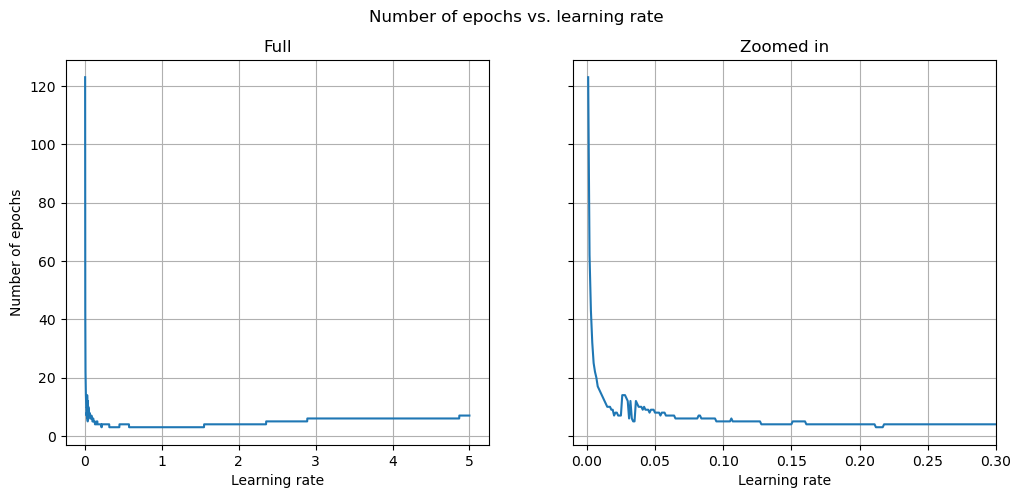

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey= True)
fig.suptitle('Number of epochs vs. learning rate')
ax1.plot(alphas, num_of_epochs)

ax1.set_title('Full')

ax1.set(xlabel = 'Learning rate', ylabel = 'Number of epochs')
ax1.grid()

ax2.plot(alphas, num_of_epochs)

ax2.set_title('Zoomed in')

ax2.set(xlabel = 'Learning rate', xlim=(-0.01, 0.3))

ax2.grid()




So as we can see on the graph low learning rate leads to slow learning, while high learning rate leads to fast learning, but with a lot of oscillations. So we need to find a balance between the two.

Since the data set and the problem itself is relatively easy, it is not difficult to find a global minimum. But in real lie problems, picking a learning rate is very important, because if we pick a learning rate that is too high, we might miss the global minimum, and if we pick a learning rate that is too low, we might need a lot of epochs to reach the global minimum.  